## Exploratory Data Analysis
### Business/Domain Understanding
Emergency Responder calls from https://data.cincinnati-oh.gov/

#### Start with why
We're looking at response times in different areas to determine which factors might impact response time. We don't have a hypothesis yet. That's to be developed during this EDA process.

#### Then what
Patterns may indicate time periods or areas where additional EMTs are needed.

In [139]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [140]:
fire_df = pd.read_csv("data/fire.csv")

### Data Understanding
#### What data do we have? What type? How complete/clean is it?

In [141]:
fire_df

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP
0,XX WEST ST,39.147267,-84.511815,CF,06/01/2015 08:06:41 PM,MEDIC DISREGARD,FCF150601000178,6D2,BREATHING PROB-DIFF,AVONDALE,06/01/2015 08:09:43 PM,2331,06/01/2015 08:20:56 PM,06/01/2015 08:06:48 PM,ALS,BREATHING PROBLEMS
1,10XX SYCAMORE ST,39.106060,-84.509984,CF,07/30/2016 01:01:07 AM,MEDIC DISREGARD,FCF160730000013,12D2,SEIZURES-CONTINUOUS,DOWNTOWN,NaN,1247,07/30/2016 01:05:16 AM,07/30/2016 01:01:22 AM,ALS,CONVULSIONS / SEIZURES
2,8XX POPLAR ST,39.114731,-84.528050,CF,10/21/2016 04:33:20 AM,MEDIC TR RESP & TRANSPORTED,FCF161021000029,6D1,BREATHING PROB-NOT A,WEST END,10/21/2016 04:36:25 AM,3267,10/21/2016 05:25:17 AM,10/21/2016 04:33:46 AM,ALS,BREATHING PROBLEMS
3,34XX TRIMBLE AV,39.140692,-84.467465,CF,09/25/2016 09:47:50 PM,MEDIC TR RESP & TRANSPORTED,FCF160925000183,HERONF,HEROIN OD,EVANSTON,09/25/2016 09:52:08 PM,4238,09/25/2016 10:36:30 PM,09/25/2016 09:48:09 PM,ALS,HERION OVERDOSE
4,9XX WILLIAM H TAFT RD,39.127066,-84.489397,CFD,12/25/2017 09:15:20 PM,MEDF: MT RESPONSE - FALSE,CFD171225000153,SICKF-COMBINED,NaN,WALNUT HILLS,12/25/2017 09:20:01 PM,ST23,12/25/2017 09:22:14 PM,12/25/2017 09:17:07 PM,BLS,SICK PERSON
5,12XX CHAPEL ST,39.130968,-84.483490,CFD,11/16/2017 09:48:46 PM,MED: MT RESPONSE NO TRANSPORT,CFD171116000229,EMS,NaN,WALNUT HILLS,11/16/2017 09:51:36 PM,ST23,11/16/2017 10:01:23 PM,11/16/2017 09:49:11 PM,BLS,MEDICAL EMERGENCY
6,18XX BEACON ST,39.086897,-84.380732,CFD,08/06/2017 12:40:35 AM,MED: MT RESPONSE NO TRANSPORT,CFD170806000004,17A4,PUBLIC ASSIST (NO INJURIES AND NO PRIORITY SYM...,MT. WASHINGTON,08/06/2017 12:46:21 AM,ST07,08/06/2017 12:50:52 AM,08/06/2017 12:41:03 AM,BLS,FALLS
7,26XX BUSHNELL ST,39.103393,-84.556751,CF,11/02/2015 09:05:34 PM,MEDIC TR RESP & TRANSPORTED,FCF151102000190,1A1,ABDOMINAL PAIN,EAST PRICE HILL,11/02/2015 09:10:21 PM,7134,11/02/2015 09:45:58 PM,11/02/2015 09:05:45 PM,BLS,ABDOMINAL PAIN / PROBLEMS
8,53XX HAMILTON AV,39.186674,-84.545864,CF,05/03/2015 04:26:28 PM,EXTINGUISHMENT,FCF150503000137,STRUCT,STRUCTURE FIRE,COLLEGE HILL,05/03/2015 04:29:43 PM,3951,05/03/2015 05:02:18 PM,05/03/2015 04:27:13 PM,FIRE,STRUCTURE FIRE
9,7XX DUTCH COLONY DR,39.191573,-84.517068,CF,05/19/2016 12:53:47 AM,EXTINGUISHMENT,FCF160519000008,STRUCT,STRUCTURE FIRE,WINTON HILLS,05/19/2016 01:01:25 AM,1663,05/19/2016 01:30:36 AM,05/19/2016 12:54:24 AM,FIRE,STRUCTURE FIRE


In [142]:
#What are the datatypes?
fire_df.dtypes

ADDRESS_X                      object
LATITUDE_X                    float64
LONGITUDE_X                   float64
AGENCY                         object
CREATE_TIME_INCIDENT           object
DISPOSITION_TEXT               object
EVENT_NUMBER                   object
INCIDENT_TYPE_ID               object
INCIDENT_TYPE_DESC             object
NEIGHBORHOOD                   object
ARRIVAL_TIME_PRIMARY_UNIT      object
BEAT                           object
CLOSED_TIME_INCIDENT           object
DISPATCH_TIME_PRIMARY_UNIT     object
CFD_INCIDENT_TYPE              object
CFD_INCIDENT_TYPE_GROUP        object
dtype: object

## Data Types

### Series
* A series is a one-dimensional structure like an associative array. E.g.

Series
---------------
index | value 
---------------
0     |  -84.5099

1     |  -84.48937

2     |  -84.4432

* You can assign an index to a series. Pandas uses sequential indexes by default
* Operations on numpy arrays also work on Pandas Series

### DataFrame
* Extends a one-dimensional series to multiple dimensions. E.g.

--------------------------------------------
index |   longitude   |  latitude  | agency
--------------------------------------------------
0     |  -84.5099     |   39.1060  |  CF

1     |  -84.48937    |   39.32011 |  CFD

2     |  -84.4432     |   39.2993  |  CF

#### DataFrame indexes
* we have the row index, a sequential integer by default. There is also a column index. 

In [143]:
#Selecting elements
#dataframe_name['column_name'][row_index]
print(fire_df['AGENCY'][3])
# use df_name.loc[row_num] to select all values of an observation
fire_df.loc[35]

CF


ADDRESS_X                             37XX EASTERN HILLS LN
LATITUDE_X                                          39.1467
LONGITUDE_X                                         -84.425
AGENCY                                                   CF
CREATE_TIME_INCIDENT                 08/19/2016 05:13:32 PM
DISPOSITION_TEXT                                  EMS FALSE
EVENT_NUMBER                                FCF160819000191
INCIDENT_TYPE_ID                                       32B2
INCIDENT_TYPE_DESC                      PERSON DOWN-MEDICAL
NEIGHBORHOOD                                         OAKLEY
ARRIVAL_TIME_PRIMARY_UNIT                               NaN
BEAT                                                   8423
CLOSED_TIME_INCIDENT                 08/19/2016 05:18:16 PM
DISPATCH_TIME_PRIMARY_UNIT           08/19/2016 05:13:43 PM
CFD_INCIDENT_TYPE                                       ALS
CFD_INCIDENT_TYPE_GROUP       UNKNOWN PROBLEM (PERSON DOWN)
Name: 35, dtype: object

In [144]:
#Check for completeness
incomp = fire_df[pd.isnull(fire_df).any(axis=1)]
comp = fire_df.dropna()
print(len(comp))
print(len(incomp))
print(len(fire_df))

#Consider which values are missing
incomp

164254
92054
256308


,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP
1,10XX SYCAMORE ST,39.106060,-84.509984,CF,07/30/2016 01:01:07 AM,MEDIC DISREGARD,FCF160730000013,12D2,SEIZURES-CONTINUOUS,DOWNTOWN,NaN,1247,07/30/2016 01:05:16 AM,07/30/2016 01:01:22 AM,ALS,CONVULSIONS / SEIZURES
4,9XX WILLIAM H TAFT RD,39.127066,-84.489397,CFD,12/25/2017 09:15:20 PM,MEDF: MT RESPONSE - FALSE,CFD171225000153,SICKF-COMBINED,NaN,WALNUT HILLS,12/25/2017 09:20:01 PM,ST23,12/25/2017 09:22:14 PM,12/25/2017 09:17:07 PM,BLS,SICK PERSON
5,12XX CHAPEL ST,39.130968,-84.483490,CFD,11/16/2017 09:48:46 PM,MED: MT RESPONSE NO TRANSPORT,CFD171116000229,EMS,NaN,WALNUT HILLS,11/16/2017 09:51:36 PM,ST23,11/16/2017 10:01:23 PM,11/16/2017 09:49:11 PM,BLS,MEDICAL EMERGENCY
10,4XX HICKORY ST,39.143810,-84.498308,CF,03/30/2015 09:41:37 AM,CANCEL INCIDENT,FCF150330000045,INVEST,INVESTIGATION,AVONDALE,NaN,2334,03/30/2015 09:45:11 AM,NaN,FIRE,INVESTIGATION
14,3XX DIXMYTH AV,39.140237,-84.521451,CF,11/01/2016 11:28:19 AM,REMOVE HAZARD,FCF161101000074,LOCK,LOCK IN/LOCK OUT,CUF,NaN,1966,11/01/2016 11:44:11 AM,11/01/2016 11:30:49 AM,FIRE,LOCK IN/LOCK OUT
17,17XX LLANFAIR AV,39.195653,-84.548339,CFD,04/26/2017 07:46:18 AM,IN: INVESTIGATION,CFD170426000042,FALARM,NaN,COLLEGE HILL,04/26/2017 07:50:59 AM,ST51,04/26/2017 07:52:26 AM,04/26/2017 07:47:32 AM,FIRE,AUTOMATIC FIRE ALARM
24,9XX ENRIGHT AV,39.108593,-84.572825,CF,05/22/2015 09:22:10 PM,EMS DISREGARD,FCF150522000187,ACCIF,AUTO ACCIDENT INJURI,EAST PRICE HILL,NaN,7215,05/22/2015 09:32:58 PM,05/22/2015 09:22:36 PM,BLS,ACCIDENT WITH INJURY - FIRE ONLY
30,S I71 AT WH TAFT,NaN,NaN,CF,07/01/2015 03:53:38 PM,MEDIC DISREGARD,FCF150701000131,ACCIF,AUTO ACCIDENT INJURI,NaN,07/01/2015 04:05:17 PM,2625,07/01/2015 04:13:40 PM,07/01/2015 03:55:05 PM,BLS,ACCIDENT WITH INJURY - FIRE ONLY
31,28XX CENTRAL PY,NaN,NaN,CF,11/13/2015 05:24:01 PM,MEDIC TR RESP & TRANSPORTED,FCF151113000182,HERONF,HEROIN OD,NaN,11/13/2015 05:24:29 PM,1461,11/13/2015 06:01:17 PM,11/13/2015 05:24:18 PM,ALS,HERION OVERDOSE
32,7XX N FRED SHUTTLESWORTH CIR,39.154002,-84.487091,CFD,09/20/2017 09:10:02 PM,MED: MT RESPONSE NO TRANSPORT,CFD170920000235,EMS,NaN,AVONDALE,09/20/2017 09:14:14 PM,ST32,09/20/2017 09:19:50 PM,09/20/2017 09:12:15 PM,BLS,MEDICAL EMERGENCY


In [145]:
#check for duplicate entries
fire_df[fire_df.duplicated()]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP


In [146]:
# Filter out only those observations that contain crucial missing values
no_nabe = fire_df[pd.isnull(fire_df['NEIGHBORHOOD'])]
print(len(no_nabe))

21658


In [147]:
#What if we want to convert the data type? 
#The date is in format %m/%d/%Y %H:%M:%S %p
#We want it in 24 hour ISO format: %Y-%m-%d %H:%M:%S
fire_df['CREATE_TIME_INCIDENT'] = pd.to_datetime(fire_df['CREATE_TIME_INCIDENT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['ARRIVAL_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['ARRIVAL_TIME_PRIMARY_UNIT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['CLOSED_TIME_INCIDENT'] = pd.to_datetime(fire_df['CLOSED_TIME_INCIDENT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df['DISPATCH_TIME_PRIMARY_UNIT'] = pd.to_datetime(fire_df['DISPATCH_TIME_PRIMARY_UNIT'], format='%m/%d/%Y %I:%M:%S %p')
fire_df.dtypes

ADDRESS_X                             object
LATITUDE_X                           float64
LONGITUDE_X                          float64
AGENCY                                object
CREATE_TIME_INCIDENT          datetime64[ns]
DISPOSITION_TEXT                      object
EVENT_NUMBER                          object
INCIDENT_TYPE_ID                      object
INCIDENT_TYPE_DESC                    object
NEIGHBORHOOD                          object
ARRIVAL_TIME_PRIMARY_UNIT     datetime64[ns]
BEAT                                  object
CLOSED_TIME_INCIDENT          datetime64[ns]
DISPATCH_TIME_PRIMARY_UNIT    datetime64[ns]
CFD_INCIDENT_TYPE                     object
CFD_INCIDENT_TYPE_GROUP               object
dtype: object

In [148]:
#Cool. What was the arrival time?
import datetime

TTA = pd.to_timedelta(fire_df['ARRIVAL_TIME_PRIMARY_UNIT'] - fire_df['DISPATCH_TIME_PRIMARY_UNIT'])
TTC = pd.to_timedelta(fire_df['CLOSED_TIME_INCIDENT'] - fire_df['CREATE_TIME_INCIDENT'])


In [149]:
## What if we want the average response time, or the distribution of response time? 
## We'll want a consistent unit of measurement.
## Try converting it to minutes:
print(TTA.dt.seconds / 60)
#print(TTC)

0          2.916667
1               NaN
2          2.650000
3          3.983333
4          2.900000
5          2.416667
6          5.300000
7          4.600000
8          2.500000
9          7.016667
10              NaN
11         5.133333
12         5.166667
13         7.250000
14              NaN
15         4.450000
16         4.883333
17         3.450000
18         3.333333
19         7.800000
20         7.183333
21         4.916667
22         9.400000
23        26.383333
24              NaN
25         9.433333
26         9.216667
27         5.400000
28         2.916667
29         4.300000
            ...    
256278     4.133333
256279    12.150000
256280     7.133333
256281     4.716667
256282          NaN
256283     5.300000
256284     0.050000
256285    18.350000
256286          NaN
256287     5.316667
256288     6.333333
256289     4.133333
256290     4.466667
256291     7.366667
256292     3.800000
256293     5.266667
256294     3.100000
256295    18.500000
256296          NaN


In [150]:
#What are the unique values in INCIDENT_TYPE_DESC?
pd.unique(fire_df['INCIDENT_TYPE_DESC'])

array(['BREATHING PROB-DIFF', 'SEIZURES-CONTINUOUS',
       'BREATHING PROB-NOT A', 'HEROIN OD', nan,
       'PUBLIC ASSIST (NO INJURIES AND NO PRIORITY SYMPTOMS)',
       'ABDOMINAL PAIN', 'STRUCTURE FIRE', 'INVESTIGATION',
       'SICK PERSON-ABNORMAL', 'LOCK IN/LOCK OUT', 'SICK PERSON-VOMITING',
       'SICK PERSON/NO PRIOR', 'HEADACHE-NUMBNESS',
       'ALTERED LEVEL OF CONSCIOUSNESS', 'MEDICAL EMERGENCY **',
       'UNCONSCIOUS', 'ABDOM PAIN-FM W/PAIN', 'AUTO ACCIDENT INJURI',
       'CARDIAC/RESPIRATORY/', 'DIFFICULTY SPEAKING BETWEEN BREATHS',
       'UNKNOWN STATUS/OTHER CODES NOT APPLICABLE', 'FALARM',
       'SICK PERSON-SICKLE C', 'PERSON DOWN-MEDICAL', 'WIRES DOWN',
       'OTHER PAIN (NON-OMEGA-LEVEL)', 'PERSON DOWN AND OUT',
       'HEART PROBLEM-DIFFIC', 'FALLS - PUBLIC ASSIS',
       'ABDOMINAL PAIN/CRAMPING (< 6 MONTHS/24 WEEKS AND NO FETUS OR TISSUE)',
       'SICK PERSON-DIZZINES', 'SICK PERSON-NOT ALER', 'NOT ALERT',
       'SEVERE EYE INJURIES',
       'NO PRIORITY

### Selecting rows with booleans
What if we only want a subset of the data? We can use booleans to select only matching values and put them into a new dataframe.

In [153]:
cuf = fire_df.loc[fire_df['NEIGHBORHOOD'] == 'CUF']

In [154]:
cuf

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP
14,3XX DIXMYTH AV,39.140237,-84.521451,CF,2016-11-01 11:28:19,REMOVE HAZARD,FCF161101000074,LOCK,LOCK IN/LOCK OUT,CUF,NaT,1966,2016-11-01 11:44:11,2016-11-01 11:30:49,FIRE,LOCK IN/LOCK OUT
51,2XX CALHOUN ST,39.127472,-84.515784,CFD,2017-05-13 06:09:36,MEDD: MT DISREGARDED,CFD170513000047,16B1,SEVERE EYE INJURIES,CUF,NaT,ST19,2017-05-13 06:39:18,2017-05-13 06:10:58,ALS,EYE PROBLEMS / INJURIES
59,7XX STRAIGHT ST,39.131341,-84.529589,CF,2017-01-18 22:03:41,TREATED BY COMPANY/NO TRNSPORT,FCF170118000211,30A1,TRAUMATIC INJURY-ANK,CUF,NaT,1441,2017-01-18 22:21:51,2017-01-18 22:04:58,BLS,TRAUMATIC INJURIES (SPECIFIC)
82,5XX W MCMILLAN ST,39.128316,-84.527813,CFD,2017-11-12 05:35:18,IN: INVESTIGATION,CFD171112000028,WIRES,NaN,CUF,2017-11-12 05:42:12,ST12,2017-11-12 06:50:48,2017-11-12 05:35:48,FIRE,WIRES DOWN/ARCING
93,XX W MCMILLAN ST,39.127809,-84.512208,CF,2017-01-23 13:04:34,MEDIC TR RESP- NO TRANSPORT,FCF170123000120,32B2,PERSON DOWN-MEDICAL,CUF,2017-01-23 13:08:09,1949,2017-01-23 13:12:57,2017-01-23 13:04:52,ALS,UNKNOWN PROBLEM (PERSON DOWN)
118,25XX CLIFTON AV,39.129378,-84.518062,CF,2015-10-12 01:01:34,MEDIC TR RESP & TRANSPORTED,FCF151012000009,10D4,CHEST PAIN-CLAMMY,CUF,2015-10-12 01:06:01,1956,2015-10-12 01:38:12,2015-10-12 01:01:40,ALS,CHEST PAIN / CHEST DISCOMFORT (NON-TRAUMATIC)
129,STRATFORD AV/WARNER ST,39.125772,-84.522842,CF,2015-07-20 13:45:44,CANCEL INCIDENT,FCF150720000106,INFOF,TELETYPE MESSAGE,CUF,NaT,1423,2015-07-20 14:05:59,NaT,OTHE,INFORMATION TELETYPE-NO DISPATCH
174,23XX FLORA ST,39.127369,-84.523481,CF,2017-01-13 17:49:14,MEDIC TR RESP & TRANSPORTED,FCF170113000174,6D2,BREATHING PROB-DIFF,CUF,2017-01-13 17:54:14,1423,2017-01-13 18:53:42,2017-01-13 17:49:47,ALS,BREATHING PROBLEMS
187,CLIFTON AV/STRAIGHT ST,39.130599,-84.521371,CF,2015-05-14 22:25:46,CANCEL INCIDENT,FCF150514000191,INFOF,TELETYPE MESSAGE,CUF,NaT,1444,2015-05-14 22:29:42,NaT,OTHE,INFORMATION TELETYPE-NO DISPATCH
199,6XX PROBASCO ST,39.134660,-84.528164,CFD,2017-09-07 18:33:53,MEDT: MEDIC TRANSPORT,CFD170907000168,17B1,POSSIBLY DANGEROUS BODY AREA,CUF,2017-09-07 18:38:12,ST12,2017-09-07 19:28:54,2017-09-07 18:34:18,ALS,FALLS


In [212]:
near_uc = fire_df[fire_df['NEIGHBORHOOD'].isin(['CLIFTON','CORRYVILLE','CUF'])]

In [213]:
near_uc

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,TTA,TTC
14,3XX DIXMYTH AV,39.140237,-84.521451,CF,2016-11-01 11:28:19,REMOVE HAZARD,FCF161101000074,LOCK,LOCK IN/LOCK OUT,CUF,NaT,1966,2016-11-01 11:44:11,2016-11-01 11:30:49,FIRE,LOCK IN/LOCK OUT,NaN,15.866667
51,2XX CALHOUN ST,39.127472,-84.515784,CFD,2017-05-13 06:09:36,MEDD: MT DISREGARDED,CFD170513000047,16B1,SEVERE EYE INJURIES,CUF,NaT,ST19,2017-05-13 06:39:18,2017-05-13 06:10:58,ALS,EYE PROBLEMS / INJURIES,NaN,29.700000
59,7XX STRAIGHT ST,39.131341,-84.529589,CF,2017-01-18 22:03:41,TREATED BY COMPANY/NO TRNSPORT,FCF170118000211,30A1,TRAUMATIC INJURY-ANK,CUF,NaT,1441,2017-01-18 22:21:51,2017-01-18 22:04:58,BLS,TRAUMATIC INJURIES (SPECIFIC),NaN,18.166667
78,30XX BURNET AV,39.135187,-84.500998,CF,2016-04-13 10:47:04,MEDIC TR RESP & TRANSPORTED,FCF160413000067,12A1,CONVULSIONS/SEIZURE-,CORRYVILLE,2016-04-13 10:52:37,2283,2016-04-13 11:35:34,2016-04-13 10:50:32,BLS,CONVULSIONS / SEIZURES,2.083333,48.500000
82,5XX W MCMILLAN ST,39.128316,-84.527813,CFD,2017-11-12 05:35:18,IN: INVESTIGATION,CFD171112000028,WIRES,NaN,CUF,2017-11-12 05:42:12,ST12,2017-11-12 06:50:48,2017-11-12 05:35:48,FIRE,WIRES DOWN/ARCING,6.400000,75.500000
93,XX W MCMILLAN ST,39.127809,-84.512208,CF,2017-01-23 13:04:34,MEDIC TR RESP- NO TRANSPORT,FCF170123000120,32B2,PERSON DOWN-MEDICAL,CUF,2017-01-23 13:08:09,1949,2017-01-23 13:12:57,2017-01-23 13:04:52,ALS,UNKNOWN PROBLEM (PERSON DOWN),3.283333,8.383333
118,25XX CLIFTON AV,39.129378,-84.518062,CF,2015-10-12 01:01:34,MEDIC TR RESP & TRANSPORTED,FCF151012000009,10D4,CHEST PAIN-CLAMMY,CUF,2015-10-12 01:06:01,1956,2015-10-12 01:38:12,2015-10-12 01:01:40,ALS,CHEST PAIN / CHEST DISCOMFORT (NON-TRAUMATIC),4.350000,36.633333
129,STRATFORD AV/WARNER ST,39.125772,-84.522842,CF,2015-07-20 13:45:44,CANCEL INCIDENT,FCF150720000106,INFOF,TELETYPE MESSAGE,CUF,NaT,1423,2015-07-20 14:05:59,NaT,OTHE,INFORMATION TELETYPE-NO DISPATCH,NaN,20.250000
174,23XX FLORA ST,39.127369,-84.523481,CF,2017-01-13 17:49:14,MEDIC TR RESP & TRANSPORTED,FCF170113000174,6D2,BREATHING PROB-DIFF,CUF,2017-01-13 17:54:14,1423,2017-01-13 18:53:42,2017-01-13 17:49:47,ALS,BREATHING PROBLEMS,4.450000,64.466667
181,W MITCHELL AV / VINE ST,39.160329,-84.504781,CFD,2017-02-13 10:25:00,MEDT: MEDIC TRANSPORT,CFD170213000083,BLDGF-COMBINED,NaN,CLIFTON,2017-02-13 10:30:29,ST38,2017-02-13 10:39:25,2017-02-13 10:25:33,BLS,AUTO ACCIDENT - CAR HIT BUILDING,4.933333,14.416667


## Data Preparation
* Build the dataset(s) that will be used in our analysis

In [157]:
## add the derived variables to the main dataframe
TTA_int = TTA / np.timedelta64(1, 'm')
TTA_int
fire_df['TTA'] = TTA_int

In [158]:
TTC_int = TTC / np.timedelta64(1, 'm')
TTC_int
fire_df['TTC'] = TTC_int

In [159]:
fire_df.dtypes

ADDRESS_X                             object
LATITUDE_X                           float64
LONGITUDE_X                          float64
AGENCY                                object
CREATE_TIME_INCIDENT          datetime64[ns]
DISPOSITION_TEXT                      object
EVENT_NUMBER                          object
INCIDENT_TYPE_ID                      object
INCIDENT_TYPE_DESC                    object
NEIGHBORHOOD                          object
ARRIVAL_TIME_PRIMARY_UNIT     datetime64[ns]
BEAT                                  object
CLOSED_TIME_INCIDENT          datetime64[ns]
DISPATCH_TIME_PRIMARY_UNIT    datetime64[ns]
CFD_INCIDENT_TYPE                     object
CFD_INCIDENT_TYPE_GROUP               object
TTA                                  float64
TTC                                  float64
dtype: object

In [160]:
# use the describe() method to get a quick overview of the data
fire_df.describe()

,LATITUDE_X,LONGITUDE_X,TTA,TTC
count,232824.000000,232824.000000,2.141860e+05,2.559720e+05
mean,39.138725,-84.514307,-1.139377e+03,-4.734132e+02
std,0.371057,0.377967,4.041390e+04,2.706002e+04
min,-86.998941,-84.821111,-1.448638e+06,-1.447193e+06
25%,39.113487,-84.557758,3.333333e+00,1.388333e+01
50%,39.135000,-84.515427,4.500000e+00,2.805000e+01
75%,39.158384,-84.484793,5.966667e+00,5.073333e+01
max,39.435651,42.998769,7.365333e+02,1.322807e+05


In [161]:
fire_df['TTA'].mean()

-1139.3768217032614

In [162]:
#huhwhat? Let's see where the negative response time is coming from
outliers = (fire_df[fire_df['TTA'] <= 0])
outliers2 = (fire_df[fire_df['TTC'] <= 0])
outliers2

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,TTA,TTC
71,13XX CHAPEL ST,39.131566,-84.478935,CFD,2017-05-10 06:33:54,CN: CANCEL,CFD170510000025,NaN,NaN,WALNUT HILLS,NaT,ST23,2017-05-10 06:33:54,NaT,NaN,NaN,NaN,0.000000e+00
90,ARLINGTON ST / SPRING GROVE AV,39.144929,-84.541571,CFD,2017-07-02 02:38:30,CN: CANCEL,CFD170702000034,NaN,NaN,CAMP WASHINGTON,NaT,ST12,2017-07-02 02:38:30,NaT,NaN,NaN,NaN,0.000000e+00
188,9XX MCPHERSON AV,39.110022,-84.570996,CFD,2017-07-01 00:52:51,CN: CANCEL,CFD170701000007,NaN,NaN,EAST PRICE HILL,NaT,ST17,2017-07-01 00:52:51,NaT,NaN,NaN,NaN,0.000000e+00
311,6XX DUTCH COLONY DR,39.190582,-84.512866,CFD,2017-07-01 15:10:54,FADV: FIRE ADVISED,CFD170701000148,EMS,NaN,WINTON HILLS,NaT,ST38,2017-07-01 15:10:54,NaT,BLS,MEDICAL EMERGENCY,NaN,0.000000e+00
353,68XX WHITEHALL AV,39.074477,-84.371299,CFD,2017-06-03 12:00:33,CN: CANCEL,CFD170603000078,EMS,NaN,MT. WASHINGTON,NaT,ST07,2017-06-03 12:00:33,NaT,BLS,MEDICAL EMERGENCY,NaN,0.000000e+00
546,S I75 AT 2.8,39.128717,-84.534288,CFD,2018-01-18 07:20:34,CN: CANCEL,CFD180118000045,ACCI-COMBINED,NaN,CAMP WASHINGTON,NaT,ST12,2018-01-18 07:20:34,NaT,BLS,ACCIDENT WITH INJURY,NaN,0.000000e+00
626,20XX RADCLIFF DR,39.119547,-84.547696,CF,2016-07-17 08:32:00,FIRE ADVISED,FCF160717000070,FADV,FIRE ADVISED RUN,EAST PRICE HILL,NaT,5142,2016-07-17 08:32:00,NaT,OTHE,FIRE ADVISED - NO DISPATCH,NaN,0.000000e+00
721,MOHAWK ST / STONEWALL ST,39.120039,-84.523892,CFD,2017-05-26 22:10:25,CN: CANCEL,CFD170526000229,NaN,NaN,OVER-THE-RHINE,NaT,ST05,2017-05-26 22:10:25,NaT,NaN,NaN,NaN,0.000000e+00
861,1XX E 12TH ST,39.108604,-84.511834,CF,2015-02-25 12:33:27,FIRE ADVISED,FCF150225000074,FADV,FIRE ADVISED RUN,OVER-THE-RHINE,NaT,1267,2015-02-25 12:33:27,NaT,OTHE,FIRE ADVISED - NO DISPATCH,NaN,0.000000e+00
915,15XX HOPPLE ST,NaN,NaN,CF,2016-03-10 17:56:24,FIRE ADVISED,FCF160310000162,FADV,FIRE ADVISED RUN,NaN,NaT,3332,2016-03-10 17:56:24,NaT,OTHE,FIRE ADVISED - NO DISPATCH,NaN,0.000000e+00


In [163]:
# So no arrival time was recorded, leaving us with huge negative numbers that skew the mean. Let's drop those.
# We also have many cases of NaN, so we'll remove those as well
print(len(fire_df))

clean_df = fire_df[fire_df['TTA'] > 0]
clean_df = clean_df[clean_df['TTC'] > 0]

print(len(clean_df))

256308
211773


In [164]:
clean_df.describe()

,LATITUDE_X,LONGITUDE_X,TTA,TTC
count,193033.000000,193033.000000,211773.000000,211773.000000
mean,39.140408,-84.515310,5.690749,41.015419
std,0.031858,0.057082,19.481538,311.709463
min,39.037702,-84.793474,0.016667,0.033333
25%,39.113778,-84.559152,3.366667,16.866667
50%,39.135413,-84.515510,4.516667,33.783333
75%,39.159464,-84.483728,5.983333,52.550000
max,39.289210,-84.218196,736.533333,132280.733333


In [165]:
clean_df[clean_df['TTA'] > clean_df['TTC']]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,TTA,TTC
5891,4XX RIDDLE RD,39.135592,-84.523027,CFD,2018-01-20 01:19:14,MEDT: MEDIC TRANSPORT,CFD180120000007,6D1,NOT ALERT,CUF,2018-01-20 00:52:01,ST34,2018-01-20 01:20:48,2018-01-20 00:48:11,ALS,BREATHING PROBLEMS,3.833333,1.566667
10530,3XX TERRACE AV,39.142508,-84.521764,CFD,2017-02-10 00:58:51,MEDT: MEDIC TRANSPORT,CFD170210000011,5A1,NON-TRAUMATIC BACK PAIN,CLIFTON,2017-02-10 13:02:24,ST34,2017-02-10 01:31:19,2017-02-10 00:59:58,BLS,BACK PAIN (NON-TRAUMATIC OR NON-RECENT TRAUMA),722.433333,32.466667
11809,2XX FOSDICK ST,39.131256,-84.506018,CFD,2018-01-11 14:02:26,FALA: FIRE FALSE ACCIDENTAL,CFD180111000148,FALARM,NaN,CORRYVILLE,2018-01-11 14:08:12,ST19,2018-01-11 14:07:12,2018-01-11 14:02:43,FIRE,AUTOMATIC FIRE ALARM,5.483333,4.766667
13396,S I75 AT 3.4,39.138216,-84.534655,CFD,2017-09-12 07:16:19,GI: GOOD INTENT,CFD170912000053,VEH,NaN,CAMP WASHINGTON,2017-09-12 07:24:47,ST12,2017-09-12 07:24:02,2017-09-12 07:16:56,FIRE,VEHICAL FIRE,7.850000,7.716667
14597,12XX ROSSMORE AV,39.178567,-84.476464,CFD,2017-01-26 20:27:16,MEDT: MEDIC TRANSPORT,CFD170126000210,6D2E,DIFFICULTY SPEAKING BETWEEN BREATHS,BOND HILL,2017-01-27 08:34:55,ST09,2017-01-26 21:39:07,2017-01-26 20:28:15,ALS,BREATHING PROBLEMS,726.666667,71.850000
15089,13XX TEAKWOOD AV,39.207020,-84.541768,CFD,2017-11-06 08:14:46,IN: INVESTIGATION,CFD171106000009,COLAPS-COMBINED,NaN,COLLEGE HILL,2017-11-06 00:33:45,ST51,2017-11-06 08:19:04,2017-11-06 00:26:48,FIRE,STRUCTURAL OR TRENCH COLLAPSE,6.950000,4.300000
15596,7XX GRAND AV,39.104599,-84.559817,CFD,2017-01-24 13:07:33,CN: CANCEL,CFD170124000126,26A8,OTHER PAIN (NON-OMEGA-LEVEL),EAST PRICE HILL,2017-01-24 14:22:16,ST17,2017-01-24 14:20:06,2017-01-24 13:08:53,BLS,SICK PERSON,73.383333,72.550000
15660,MOHAWK PL / CENTRAL PKWY,39.120430,-84.524989,CFD,2017-12-02 16:44:33,EMSF: FALSE,CFD171202000150,PERDWN-COMBINED,NaN,OVER-THE-RHINE,2017-12-02 16:47:17,ST29,2017-12-02 16:45:43,2017-12-02 16:44:53,BLS,PERSON DOWN,2.400000,1.166667
18764,ASHTREE DR / HAMILTON AV,39.178331,-84.544728,CFD,2017-10-15 15:28:35,MED: MT RESPONSE NO TRANSPORT,CFD171015000147,29B1,INJURIES,COLLEGE HILL,2017-10-15 15:30:19,ST20,2017-10-15 15:29:20,2017-10-15 15:28:42,ALS,TRAFFIC / TRANSPORTATION INCIDENTS,1.616667,0.750000
20207,84XX VINE ST,39.217031,-84.473460,CFD,2017-05-12 16:47:04,EMSD: DISREGARD,CFD170512000141,PERDWN-COMBINED,NaN,HARTWELL,2017-05-12 16:55:20,ST02,2017-05-12 16:56:37,2017-05-12 16:44:10,BLS,PERSON DOWN,11.166667,9.550000


In [166]:
clean_df = clean_df[clean_df['TTA'] < clean_df['TTC']]

In [167]:
len(clean_df)

211542

In [168]:
clean_df.describe()

,LATITUDE_X,LONGITUDE_X,TTA,TTC
count,192802.000000,192802.000000,211542.000000,211542.000000
mean,39.140400,-84.515316,5.339079,41.030290
std,0.031862,0.057096,11.495314,311.877592
min,39.037702,-84.793474,0.016667,0.233333
25%,39.113772,-84.559170,3.366667,16.883333
50%,39.135394,-84.515514,4.516667,33.783333
75%,39.159463,-84.483758,5.983333,52.550000
max,39.289210,-84.218196,731.916667,132280.733333


## Exploratory Visualization

### Looking for patterns and outliers|
* Matplotlib is simple and easy to get started with
* Not as adept at presentation and storytelling as Tableau
* Designed to offer a similar experience to MatLab
* Pyplot is part of matplotlib and we'll be using it to create basic graphics

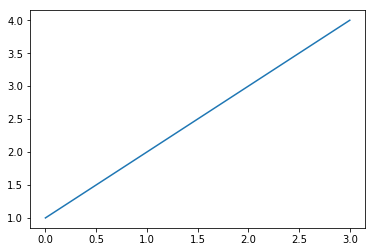

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4])
#matplotlib assumes these are the y values and the corresponding x values are 0,1,2,3
plt.show()

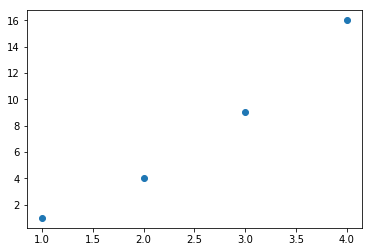

In [190]:
#enter x data, y data, then options
plt.plot([1,2,3,4],[1,4,9,16], 'o')
# here, the "o" option means to use points rather than the default of a line
plt.show()

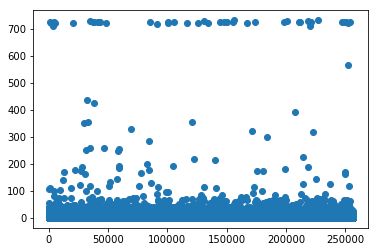

In [171]:
#plot time to arrival (TTA) as points
plt.plot(clean_df['TTA'], "o")
plt.show()

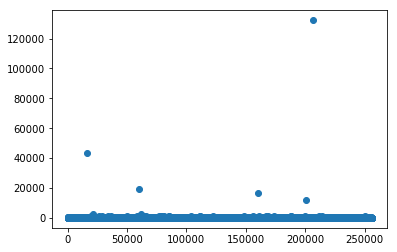

In [172]:
#plot time to close (TTC) as points
plt.plot(clean_df['TTC'], "o")
plt.show()

## Observations
* There is an obvious pattern in TTA occuring around 700 minutes - likely a system-imposed limit
* There are five very obvious outliers in the TTC
* It's probably safe to remove times greater than 500 minutes. 

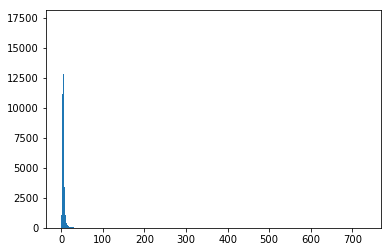

In [173]:
#plot TTA as a histogram
plt.hist(clean_df['TTA'], bins=2000)
plt.show()

In [174]:
#remove outliers
clean_df = clean_df[clean_df['TTA'] < 500]
clean_df = clean_df[clean_df['TTC'] < 1000]
len(clean_df)

211472

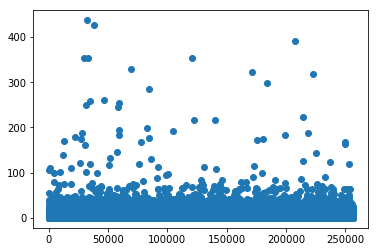

In [175]:
plt.plot(clean_df['TTA'], "o")
plt.show()

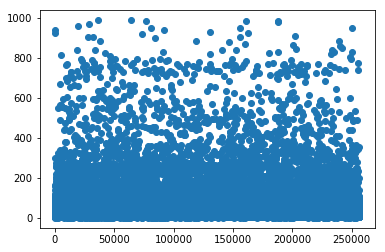

In [176]:
plt.plot(clean_df['TTC'], "o")
plt.show()

In [177]:
# what about outliers with unrealistically low values?
super_fast = clean_df[clean_df['TTA'] < 1.0]
super_fast

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGENCY,CREATE_TIME_INCIDENT,DISPOSITION_TEXT,EVENT_NUMBER,INCIDENT_TYPE_ID,INCIDENT_TYPE_DESC,NEIGHBORHOOD,ARRIVAL_TIME_PRIMARY_UNIT,BEAT,CLOSED_TIME_INCIDENT,DISPATCH_TIME_PRIMARY_UNIT,CFD_INCIDENT_TYPE,CFD_INCIDENT_TYPE_GROUP,TTA,TTC
31,28XX CENTRAL PY,NaN,NaN,CF,2015-11-13 17:24:01,MEDIC TR RESP & TRANSPORTED,FCF151113000182,HERONF,HEROIN OD,NaN,2015-11-13 17:24:29,1461,2015-11-13 18:01:17,2015-11-13 17:24:18,ALS,HERION OVERDOSE,0.183333,37.266667
54,3XX ELBERON AV,NaN,NaN,CF,2016-08-14 19:50:47,MEDIC DISREGARD,FCF160814000166,ACCIF,AUTO ACCIDENT INJURI,NaN,2016-08-14 19:52:16,7134,2016-08-14 19:58:14,2016-08-14 19:52:05,BLS,ACCIDENT WITH INJURY - FIRE ONLY,0.183333,7.450000
55,16XX LINN ST,39.113450,-84.526988,CFD,2017-08-06 20:47:07,MEDT: MEDIC TRANSPORT,CFD170806000178,26A1,NO PRIORITY SYMPTOMS (COMPLAINT CONDITIONS 2–1...,WEST END,2017-08-06 20:48:29,ST29,2017-08-06 21:35:15,2017-08-06 20:48:13,BLS,SICK PERSON,0.266667,48.133333
65,21XX FREEMAN AV,39.120780,-84.531563,CF,2016-06-07 09:47:13,TREATED BY COMPANY/NO TRNSPORT,FCF160607000053,EMS,MEDICAL EMERGENCY **,WEST END,2016-06-07 09:50:17,3294,2016-06-07 10:04:13,2016-06-07 09:49:18,BLS,MEDICAL EMERGENCY,0.983333,17.000000
109,1XX JOE NUXHALL WY,39.096745,-84.506685,CFD,2017-04-18 17:45:17,IN: INVESTIGATION,CFD170418000183,DETAIL,NaN,DOWNTOWN,2017-04-18 17:45:33,ST14,2017-04-18 22:45:30,2017-04-18 17:45:23,OTHE,DETAIL/SPECIAL ASSIGNMENT,0.166667,300.216667
122,16XX MOORE ST,NaN,NaN,CF,2015-03-07 09:27:25,STANDBY,FCF150307000079,DETAIL,DETAIL,NaN,2015-03-07 09:27:50,1316,2015-03-08 01:08:35,2015-03-07 09:27:36,OTHE,DETAIL/SPECIAL ASSIGNMENT,0.233333,941.166667
166,16XX ELM ST,39.113029,-84.519862,CF,2016-05-21 16:59:12,TREATED BY COMPANY/NO TRNSPORT,FCF160521000142,EMS,MEDICAL EMERGENCY **,OVER-THE-RHINE,2016-05-21 16:59:40,1334,2016-05-21 17:03:47,2016-05-21 16:59:37,BLS,MEDICAL EMERGENCY,0.050000,4.583333
355,28XX VINE ST,39.131701,-84.507963,CF,2016-03-08 21:21:23,INVESTIGATE ONLY,FCF160308000164,STUCK,STUCK ELEVATOR,CORRYVILLE,2016-03-08 21:22:33,2261,2016-03-08 21:29:21,2016-03-08 21:21:53,OTHE,STUCK IN ELEVATOR,0.666667,7.966667
411,43XX READING RD,39.164415,-84.471678,CF,2016-03-09 04:06:54,MEDIC TR RESP & TRANSPORTED,FCF160309000022,6E1,BREATHING PROBLEM-IN,NORTH AVONDALE - PADDOCK HILLS,2016-03-09 04:08:08,2513,2016-03-09 04:52:26,2016-03-09 04:07:13,ALS,BREATHING PROBLEMS,0.916667,45.533333
418,19XX QUEEN CITY AV,39.127893,-84.564434,CFD,2017-06-26 16:53:15,MEDT: MEDIC TRANSPORT,CFD170626000179,ACCI-COMBINED,NaN,SOUTH FAIRMOUNT,2017-06-26 16:54:50,ST21,2017-06-26 17:47:08,2017-06-26 16:53:56,BLS,ACCIDENT WITH INJURY,0.900000,53.883333


## Examining Outliers
* These are mostly classified as specific incident types with many firestation walkins and detail/special assignments. 
* We'd likely need a subject matter expert to help determine which of these contain errors

In [178]:
clean_df.describe()

,LATITUDE_X,LONGITUDE_X,TTA,TTC
count,192739.000000,192739.000000,211472.000000,211472.000000
mean,39.140397,-84.515322,5.190589,39.708065
std,0.031863,0.057100,5.058615,42.903045
min,39.037702,-84.793474,0.016667,0.233333
25%,39.113770,-84.559181,3.366667,16.883333
50%,39.135388,-84.515518,4.516667,33.766667
75%,39.159460,-84.483764,5.983333,52.533333
max,39.289210,-84.218196,437.216667,988.666667


## Finding Relationships

* We've seen some patterns, but which variables, if any, are related?
* Correlation and covariance are a way to find relationships between ratio and interval variables
* Next we'll look at how visualizations can help us spot patterns and relationships in categorical variables

## Summing Up
* Data has been imported, transformed, and cleaned enough to begin a deeper exploration.
* Basic plots show major patterns and outliers, often indicating where cleaning efforts should be focused
* Further exploration will be needed to find actionable information